In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [133]:
file_path = 'all_currencies.xlsx'
sheet_name = 'DNVALD'

df_currencies = pd.read_excel(file_path, sheet_name=sheet_name, header=2, usecols='B:BBM')
df_currencies

,Unnamed: 1,2018M01D02,2018M01D03,2018M01D04,2018M01D05,2018M01D08,2018M01D09,2018M01D10,2018M01D11,2018M01D12,...,2023M08D18,2023M08D21,2023M08D22,2023M08D23,2023M08D24,2023M08D25,2023M08D28,2023M08D29,2023M08D30,2023M08D31
0,EUR,744.3700,744.4200,744.4900,744.5900,744.6700,744.6900,744.6900,744.7400,744.8700,...,745.1400,745.2400,745.3500,745.3100,745.3900,745.370,745.3000,745.2900,745.3100,745.2300
1,USD,616.9700,619.1600,617.0700,618.1700,621.9600,624.1100,620.9900,619.7400,613.7200,...,685.6900,683.2000,684.6200,689.7800,687.6300,689.650,689.5800,689.8900,684.6500,685.7100
2,GBP,836.8100,839.8200,835.5400,837.7200,842.2600,843.6500,839.8400,836.0800,837.0900,...,871.5800,871.8800,873.9200,870.1500,870.2700,870.320,868.5000,868.0300,867.4500,869.4000
3,JPY,5.4996,5.5154,5.4774,5.4569,5.5022,5.5446,5.5732,5.5499,5.5225,...,4.7128,4.6826,4.6966,4.7387,4.7189,4.725,4.7067,4.6894,4.6831,4.7021


In [134]:
dates = df_currencies.columns[1:].tolist()

In [135]:
eur_values = df_currencies.iloc[0, 1:].tolist()
usd_values = df_currencies.iloc[1, 1:].tolist()
gbp_values = df_currencies.iloc[2, 1:].tolist()
jpy_values = df_currencies.iloc[3, 1:].tolist()



In [136]:
data = {
    'Date' : dates,
    'EUR' : eur_values,
    'USD' : usd_values,
    'GBP' : gbp_values,
    'JPY' : jpy_values
}

In [154]:
df_currencies_clean = pd.DataFrame(data)
df_currencies_clean

df_currencies_clean['Date'] = df_currencies_clean['Date'].str.replace(r'(\d{4})M(\d{2})D(\d{2})', r'\1-\2-\3', regex=True)
df_currencies_clean['Date'] = pd.to_datetime(df_currencies_clean['Date'])
df_currencies_clean


,Date,EUR,USD,GBP,JPY
0,2018-01-02,744.37,616.97,836.81,5.4996
1,2018-01-03,744.42,619.16,839.82,5.5154
2,2018-01-04,744.49,617.07,835.54,5.4774
3,2018-01-05,744.59,618.17,837.72,5.4569
4,2018-01-08,744.67,621.96,842.26,5.5022
...,...,...,...,...,...
1410,2023-08-25,745.37,689.65,870.32,4.725
1411,2023-08-28,745.3,689.58,868.5,4.7067
1412,2023-08-29,745.29,689.89,868.03,4.6894
1413,2023-08-30,745.31,684.65,867.45,4.6831


In [155]:
df_currencies_clean = df_currencies_clean.replace('..', pd.NA).dropna()

-Clean the dataframe, we have records where we have values "..". drop those records then cast them to float data types

In [157]:
columns_to_cast = ['EUR', 'USD', 'GBP', 'JPY']
df_currencies_clean[columns_to_cast] = df_currencies_clean[columns_to_cast].astype(float)
df_currencies_clean.dtypes

Date    datetime64[ns]
EUR            float64
USD            float64
GBP            float64
JPY            float64
dtype: object

In [159]:
df_euro = df_currencies_clean[['Date','EUR']]
df_euro.dtypes

Date    datetime64[ns]
EUR            float64
dtype: object

<Axes: xlabel='Date'>

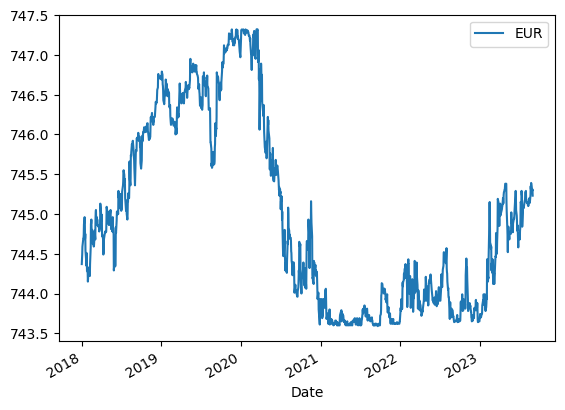

In [161]:
df_euro.plot(x='Date', y=['EUR'])